# Enterprise DNA Challenge 23: Health - Substance Abuse Data Analysis

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from pandas_profiling import ProfileReport

## Seção 1 - Análise Inicial do Conjuto de Dados

In [2]:
# Armazenando a base de dados em um DataFrame:
df = pd.read_excel('Substance Abuse.xlsx')

In [3]:
# Vizualização do conjunto de dados:
display(df)

,Admission Date,PPID,Program,Age,Gender,RaceEthnicity,MHDx,SUDx,MedDx,PsychAdmit,DLA1,DLA2
0,2022-01-13,A234282,Intervention,34,F,Other,Depression,Alcohol,2,1,3.69,4.13
1,2022-02-18,A232412,Intervention,26,M,NonHispWhite,Trauma,Opioid,0,0,4.22,4.68
2,2022-01-28,A259052,Intervention,62,M,NativeAm,Depression,Opioid,0,1,4.17,4.78
3,2022-01-30,A353421,Intervention,34,F,NonHispWhite,Depression,Alcohol,0,0,4.11,4.46
4,2022-03-28,A302351,UsualCare,46,M,NonHispBlack,Trauma,Opioid,0,1,4.19,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...
474,2022-02-24,A231168,UsualCare,58,M,Other,Psychosis,Stimulant,1,1,2.98,3.04
475,2022-02-25,A205686,UsualCare,47,F,NativeAm,Depression,Alcohol,1,0,4.25,4.23
476,2022-03-12,A213823,UsualCare,39,M,NativeAm,Psychosis,None,2,1,3.67,3.62
477,2022-03-20,A312033,UsualCare,63,M,Other,Anxiety,Opioid,0,0,3.77,3.76


In [4]:
# Função para realizar uma análise inicial do conjunto de dados:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-' * 50)
    print('TIPO DE DADOS POR FEATURE:')
    print(data.info())
    print('\n', '-' * 50)
    print('VALORES UNICOS POR FEATURE', '\n')
    print(data.nunique())
    print('\n', '-' * 50)
    print('VALORES NULOS POR FEATURE')
    print(data.isnull().sum())

show_info(df)

DATASET SHAPE:  (479, 12) 

--------------------------------------------------
TIPO DE DADOS POR FEATURE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Admission Date  479 non-null    datetime64[ns]
 1   PPID            479 non-null    object        
 2   Program         479 non-null    object        
 3   Age             479 non-null    int64         
 4   Gender          479 non-null    object        
 5   RaceEthnicity   479 non-null    object        
 6   MHDx            479 non-null    object        
 7   SUDx            479 non-null    object        
 8   MedDx           479 non-null    object        
 9   PsychAdmit      479 non-null    int64         
 10  DLA1            479 non-null    float64       
 11  DLA2            479 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
me

In [5]:
# Utilização do Pandas Profiling para auxiliar na análise inicial do conjunto de dados:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_widgets()

# Exportar o Pandas Profiling para formato html:
profile.to_file("Analise_Exploratoria.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Seção 2 - Análise Exploratória dos Dados

### 1) Variáveis Qualitativas

In [6]:
# Armazenando apenas as colunas qualitativas em um DataFrame, para realização da análise.
tipos_nominais = ['object', 'bool']
qualitativas = list(df.select_dtypes(include=tipos_nominais).columns)
qualitativas

['PPID', 'Program', 'Gender', 'RaceEthnicity', 'MHDx', 'SUDx', 'MedDx']

In [7]:
df_qualitativo = df[qualitativas]

Program


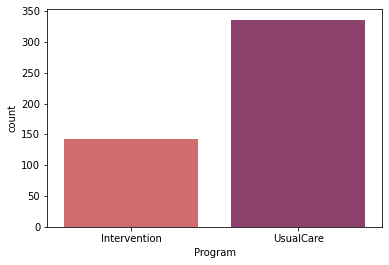

Gender


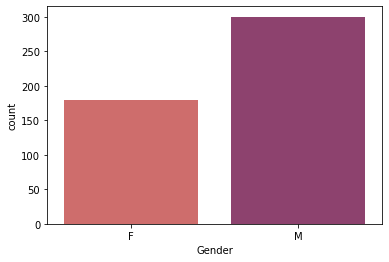

RaceEthnicity


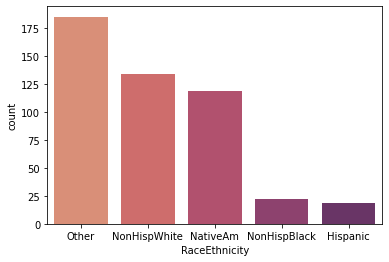

MHDx


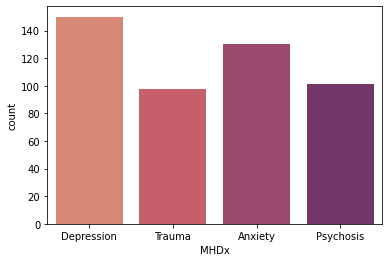

SUDx


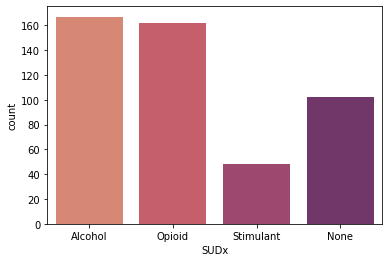

MedDx


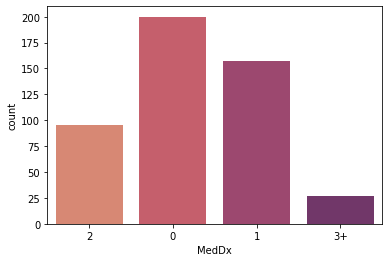

In [8]:
# Plotando gráficos de barras de com a contagem de cada variável qualitativa presente no dataframe:
for tipos_nominais in df_qualitativo:
    if tipos_nominais != 'PPID': 
        print(tipos_nominais)
        sns.countplot(df_qualitativo[tipos_nominais], palette='flare')
        plt.show()

### 2) Variáveis Quantitativas

In [9]:
# Plotando as principais informaçoes quantitativas do conjunto de dados:
df.describe()

,Age,PsychAdmit,DLA1,DLA2
count,479.000000,479.000000,479.000000,479.000000
mean,45.661795,0.613779,3.878789,4.053236
std,12.485909,0.807327,0.501458,0.587929
min,18.000000,0.000000,2.270000,2.290000
25%,37.000000,0.000000,3.510000,3.650000
50%,46.000000,0.000000,3.880000,4.040000
75%,55.000000,1.000000,4.230000,4.460000
max,80.000000,5.000000,5.530000,6.020000


In [10]:
# Armazenando apenas as colunas quantitativas em um DataFrame, para realização da análise.
tipos_quantitativos = ['int64', 'float64']
quantitativas = list(df.select_dtypes(include=tipos_quantitativos).columns)
quantitativas

['Age', 'PsychAdmit', 'DLA1', 'DLA2']

In [11]:
df_quantitativo = df[quantitativas]

Age


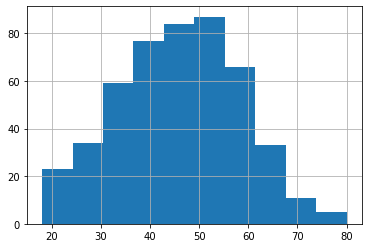

PsychAdmit


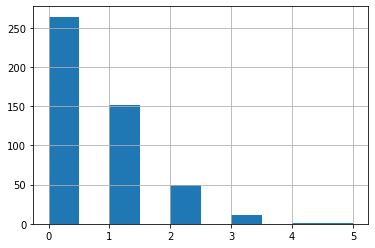

DLA1


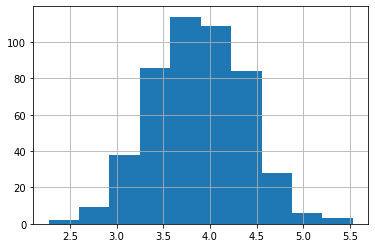

DLA2


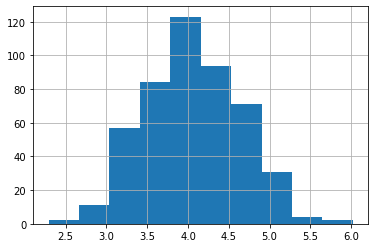

In [12]:
# Plotando gráficos histogramas para análisar a distribuição dos valores quantitativos:
for tipos_quantitativos in df_quantitativo:
    print(tipos_quantitativos)
    df_quantitativo[tipos_quantitativos].hist(bins=10)
    plt.show()

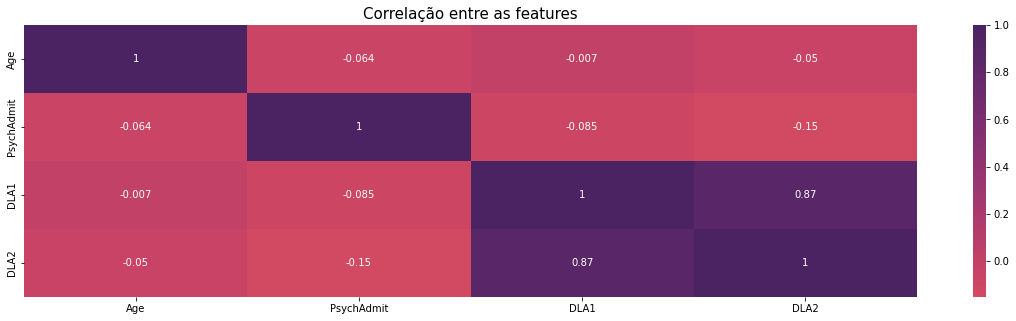

In [13]:
# Análise de correlação entre as features: 
plt.figure(figsize=(20,5))
plt.title('Correlação entre as features', size=15)
sns.heatmap(df.corr(), cmap='flare', center=0, annot=True)
plt.show()

Age


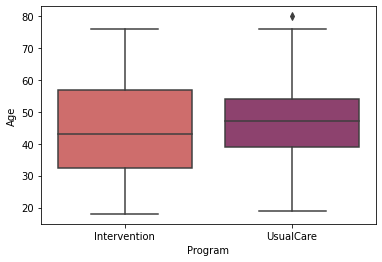

PsychAdmit


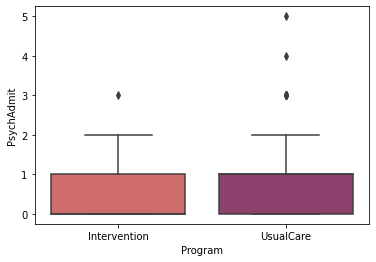

DLA1


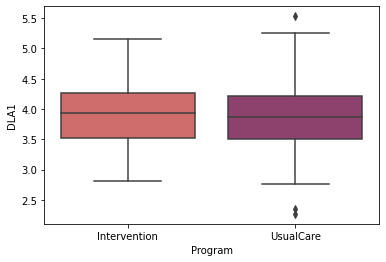

DLA2


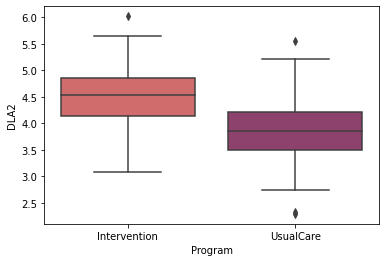

In [14]:
# Análise quantitativa Bivariada da coluna "Program": 
for tipos_quantitativos in df_quantitativo:
    print(tipos_quantitativos)
    sns.boxplot(y=df_quantitativo[tipos_quantitativos], x='Program', data=df, palette='flare')
    plt.show()

Age


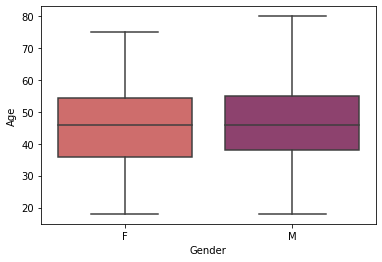

PsychAdmit


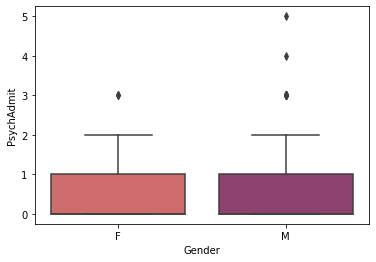

DLA1


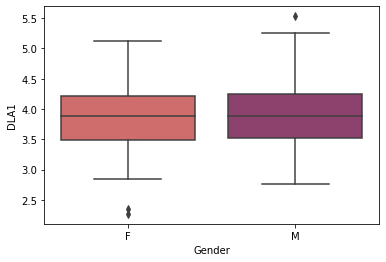

DLA2


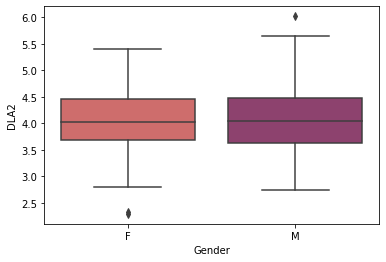

In [15]:
# Análise quantitativa Bivariada da coluna "Gender": 
for tipos_quantitativos in df_quantitativo:
    print(tipos_quantitativos)
    sns.boxplot(y=df_quantitativo[tipos_quantitativos], x='Gender', data=df, palette='flare')
    plt.show()

Age


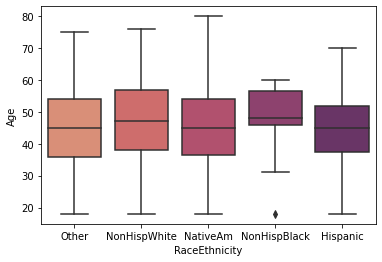

PsychAdmit


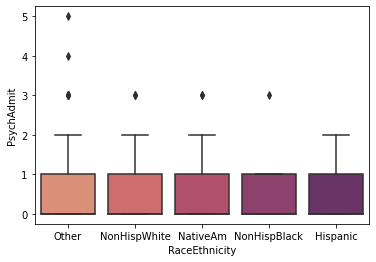

DLA1


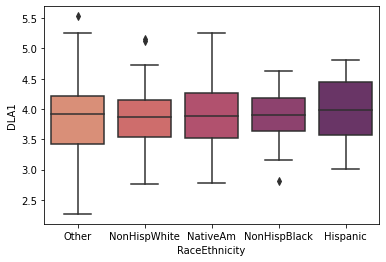

DLA2


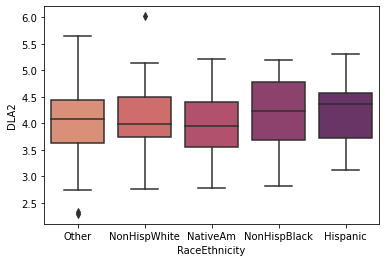

In [16]:
# Análise quantitativa Bivariada da coluna "RaceEthnicity": 
for tipos_quantitativos in df_quantitativo:
    print(tipos_quantitativos)
    sns.boxplot(y=df_quantitativo[tipos_quantitativos], x='RaceEthnicity', data=df, palette='flare')
    plt.show()

Age vs Program


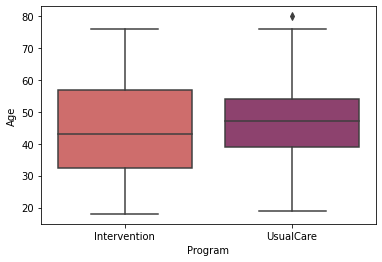

Age vs Gender


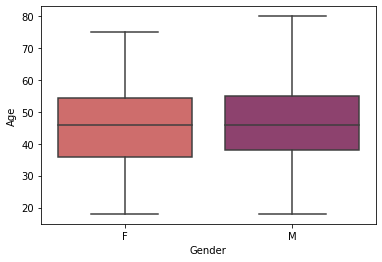

Age vs RaceEthnicity


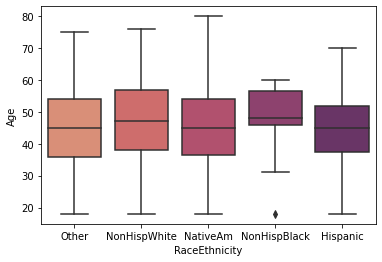

Age vs MHDx


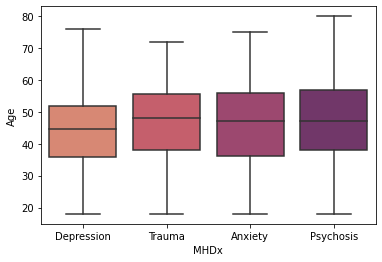

Age vs SUDx


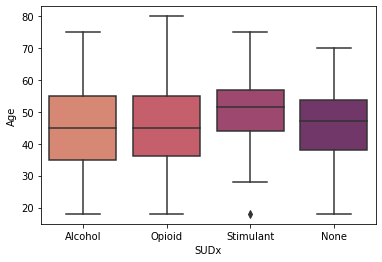

Age vs MedDx


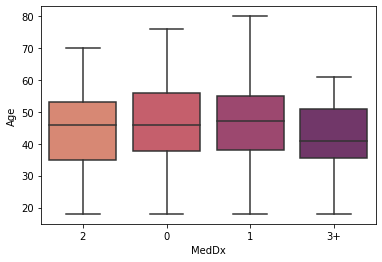

PsychAdmit vs Program


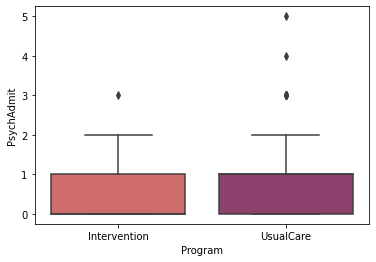

PsychAdmit vs Gender


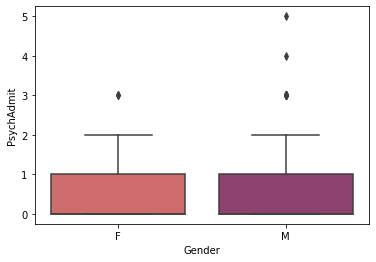

PsychAdmit vs RaceEthnicity


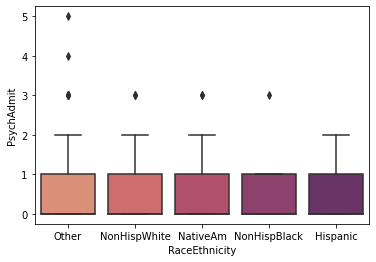

PsychAdmit vs MHDx


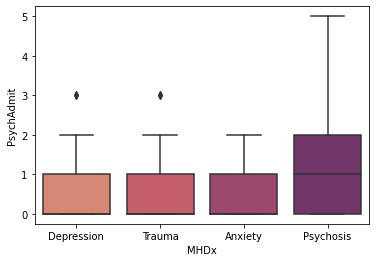

PsychAdmit vs SUDx


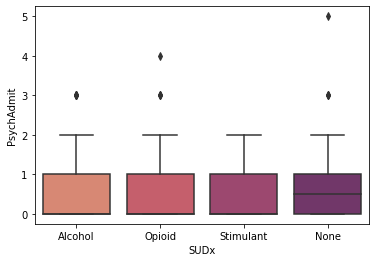

PsychAdmit vs MedDx


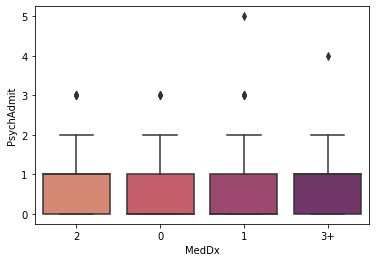

DLA1 vs Program


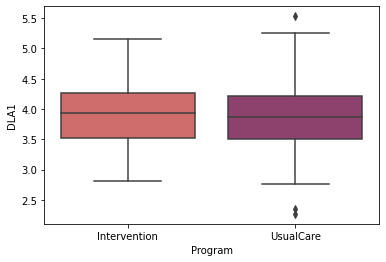

DLA1 vs Gender


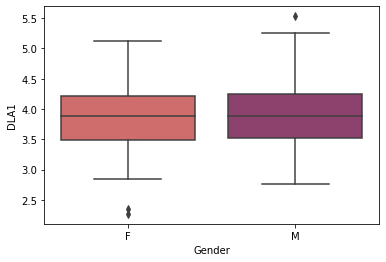

DLA1 vs RaceEthnicity


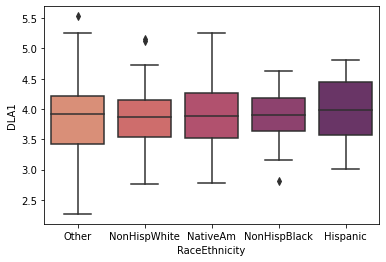

DLA1 vs MHDx


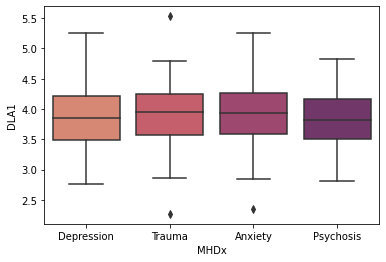

DLA1 vs SUDx


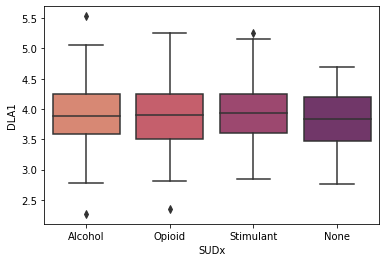

DLA1 vs MedDx


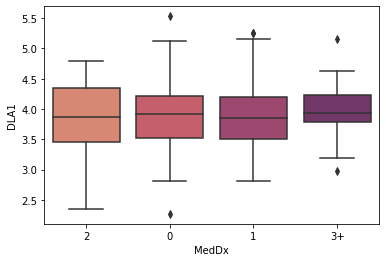

DLA2 vs Program


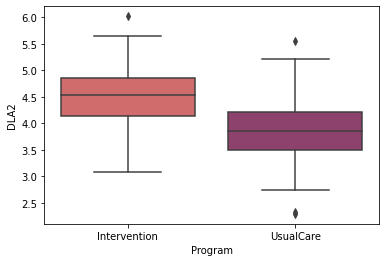

DLA2 vs Gender


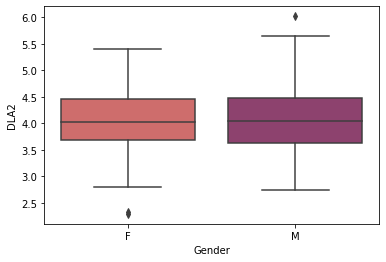

DLA2 vs RaceEthnicity


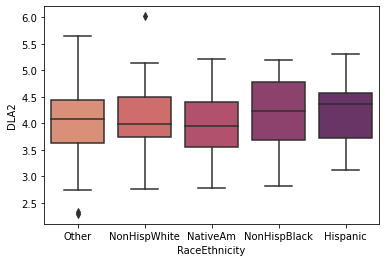

DLA2 vs MHDx


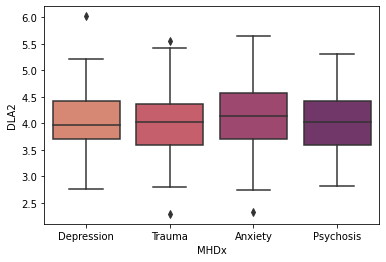

DLA2 vs SUDx


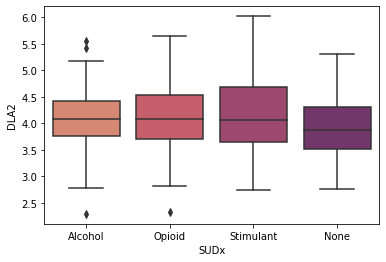

DLA2 vs MedDx


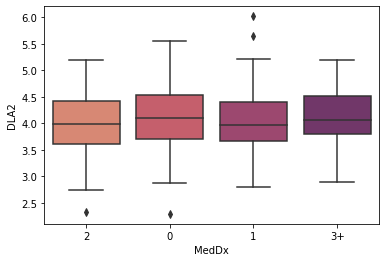

In [17]:
# Análise Bivariada Completa com gráfico Box Plot: 
for tipos_quantitativos in df_quantitativo:
    for tipos_nominais in df_qualitativo:
        if tipos_nominais != 'PPID':
            print(f'{tipos_quantitativos} vs {tipos_nominais}')
            sns.boxplot(y=df_quantitativo[tipos_quantitativos], x= tipos_nominais, data=df, palette='flare')
            plt.show()

Feature Comparada: Program


<Figure size 1080x504 with 0 Axes>

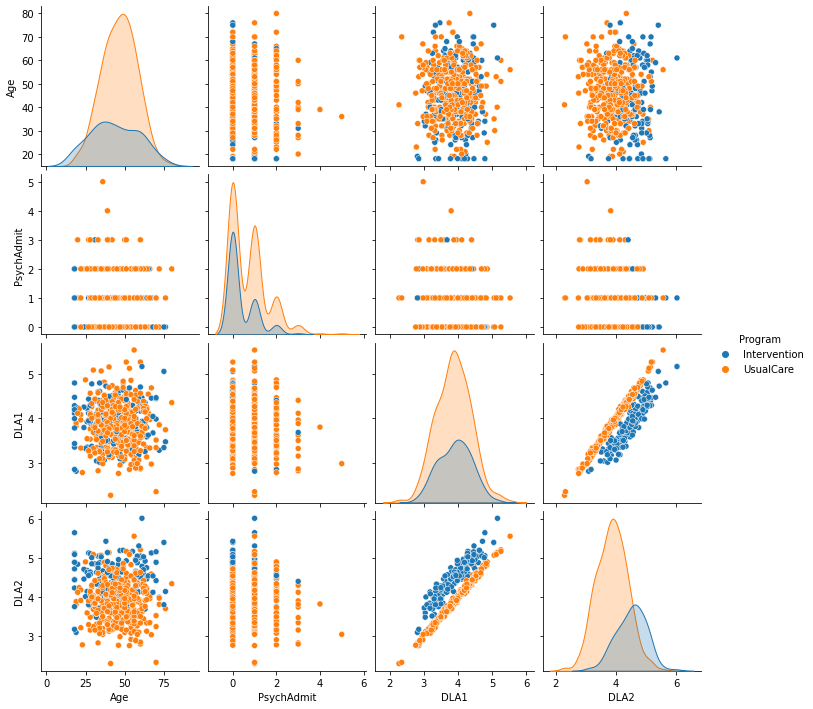

Feature Comparada: Gender


<Figure size 1080x504 with 0 Axes>

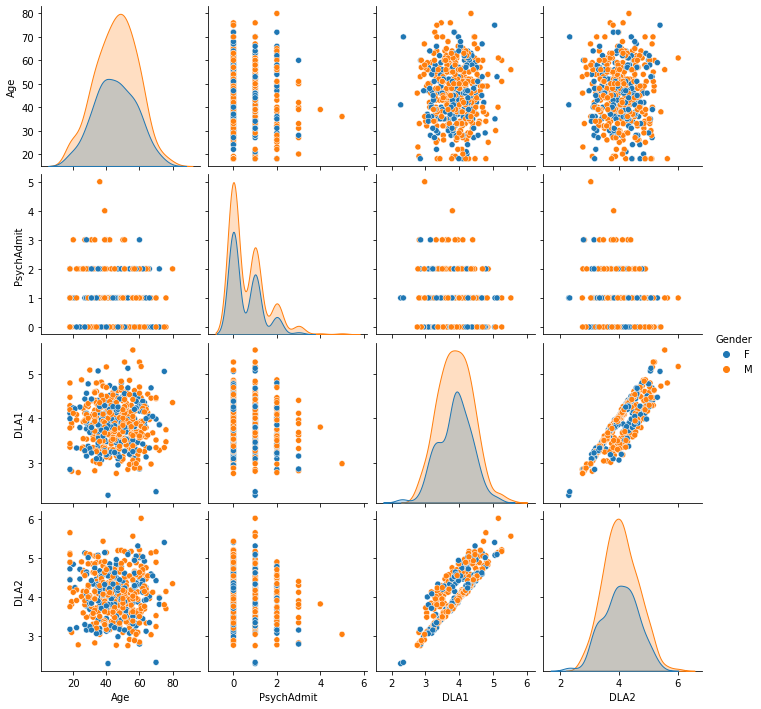

Feature Comparada: RaceEthnicity


<Figure size 1080x504 with 0 Axes>

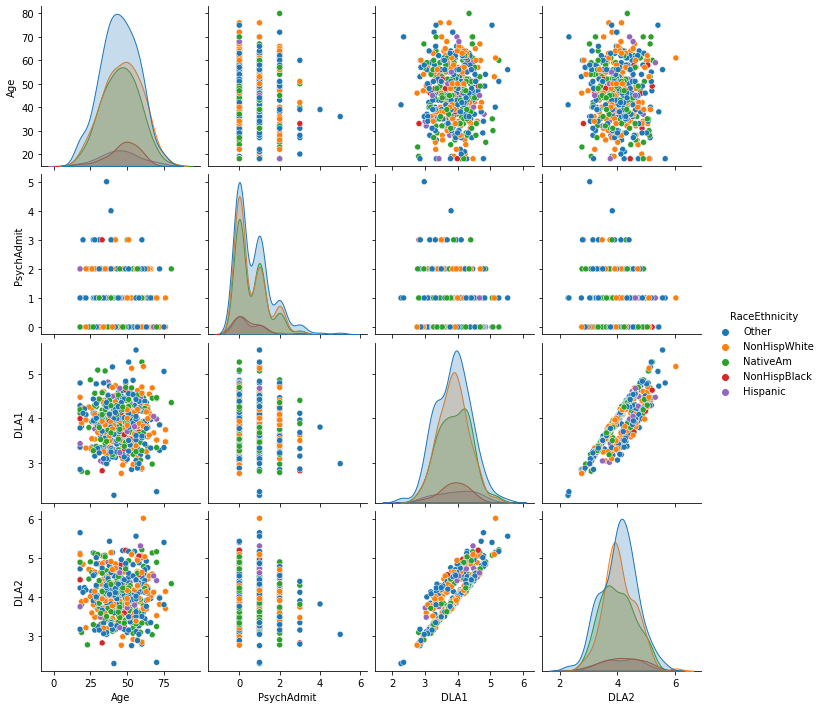

Feature Comparada: MHDx


<Figure size 1080x504 with 0 Axes>

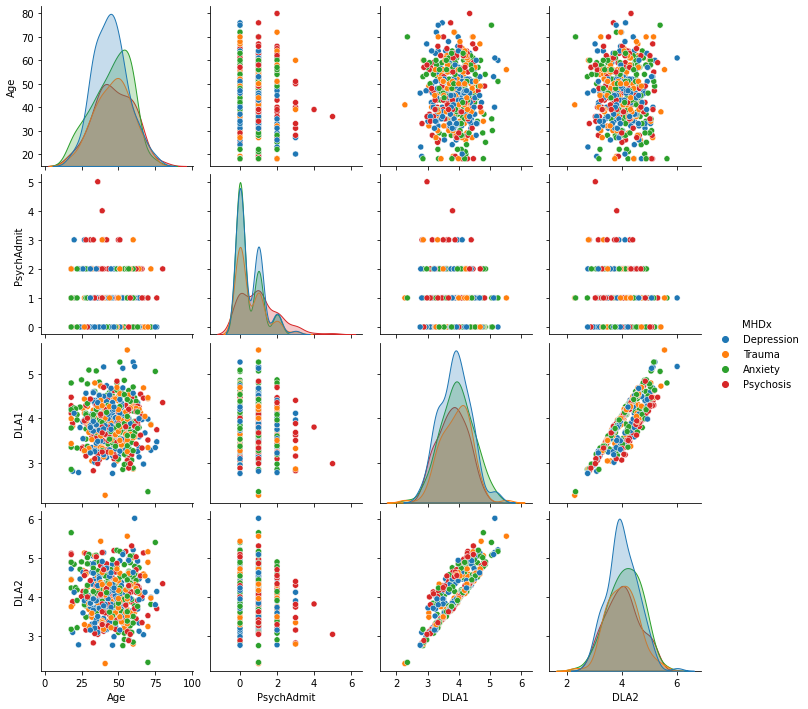

Feature Comparada: SUDx


<Figure size 1080x504 with 0 Axes>

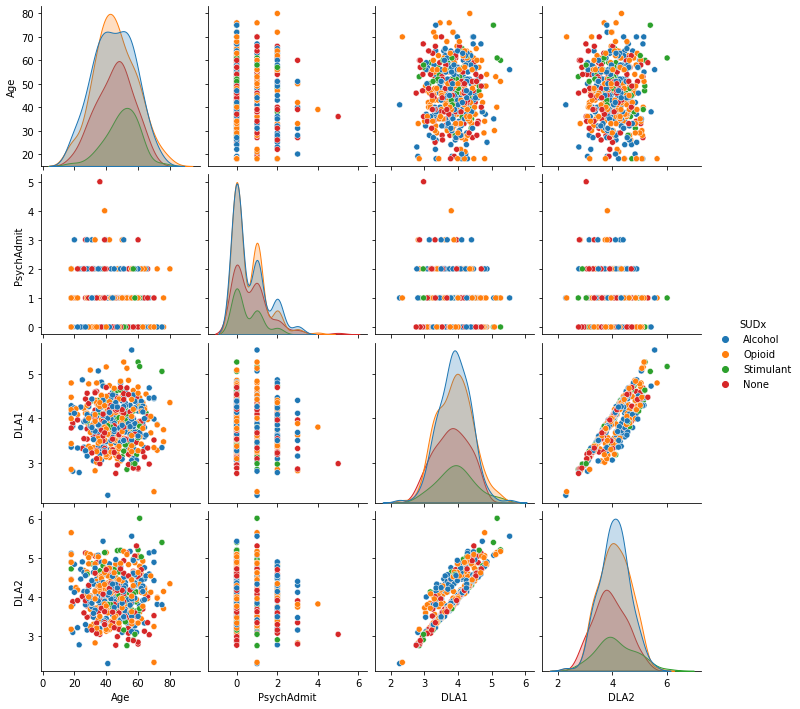

Feature Comparada: MedDx


<Figure size 1080x504 with 0 Axes>

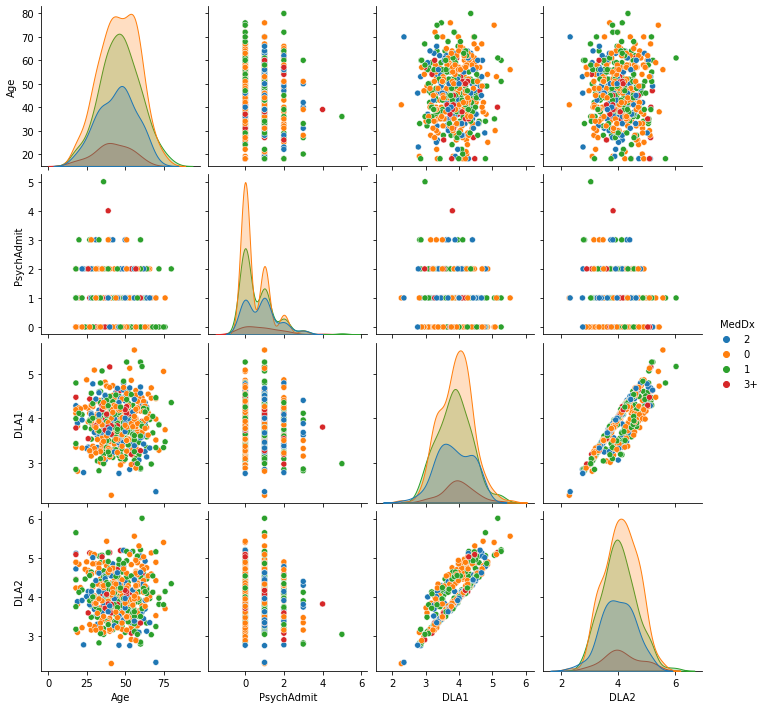

In [18]:
# Análise completa com gráfico Scatter Plot, entre todas as colunas: 
for tipos_nominais in df_qualitativo:
    if tipos_nominais != 'PPID':
        print(f'Feature Comparada: {tipos_nominais}')
        plt.figure(figsize=(15,7))
        sns.pairplot(data=df, hue=tipos_nominais)
        plt.show()